# Two-layer XOR 


## Problem statement:

Using Backpropagation algorithm to train a two layer **XOR** problem.
Let us define a one hidden layer network with two input units, N hidden layer
units and one output unit, with training set of D data samples, using the following
notation:


1. The input vector for two units as $x^{d} = (x^{d}_{1}, x^{d}_{2})$ or $x^{d}_{i}$; i = 1, 2, d = 1, .. . , D. (For the XOR problem introduced below, 4 data points exist in the dataset $x_{1}= (1, 0), x_{2}= (1, 1), x_{3} = (0, 1), x_{4} = (0, 0).)$
     
     
2. the hidden layer with N units as $h_{j}$; j = 1, . . . N. Each of these units (orneurons) is connected to all the units of the previous layer with a weight $w^{1}_{ji}$. Here j refers to the unit index of the hidden layer and the i refers to the unit index of the previous layer.


3. the non-linear function ReLu(t) = max(0, t).




## Solution

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

%matplotlib inline

### Forward Calculations:
The output is then computed as follows:

$$y(x^d, w^1, w^2, b^2, b^3) = ReLu( \sum_{j=1}^{N} [w^{2}_{j} Relu( b^{2}_{j} + \sum_{i= 1}^{2} w^{1}_{ji} x^{d}_{i}) + b_{3}])$$

In [2]:

def Relu(z):
    temp = z > 0;
    return z * temp

def forward_pass(x, W1, W2, b2,b3):
   
    '''
        x  -> 1x2
        w1 -> Nx2
        w2 -> 1xN
        b2 -> Nx1
    '''
    z1 = W1 @ x.T        # Nx1   
    a1 = Relu(z1 + b2)   #Nx1
    z2 = W2 @ a1         #1x1
    y = Relu(z2 + b3)
   
    return a1, y

### Loss Functions:
The loss function we use for training in this homework is:
$$E_\lambda ( w^1, w^2, b^2, b^3)= \frac{1}{D} \sum_{d = 1}^{D} E^d_\lambda(w^1, w^2, b^2, b^3)$$
Where:
$$E_\lambda ( w^1 , w^2 , b^2 , b^3 )) = (y(x^d , w^1 , w^2 , b^2 , b^3 ) - t^d )^2 + \lambda (|w^1 |^2 + |w^2 |^2 +|b^2 |^2 + |b^2 |^2 )$$
and $\lambda$ is a hyperparameter.

In [3]:
def loss_fun(y, y_pred, W1, W2, b2, b3 ,L = .05):
    loss = (y_pred - y)**2  + L * (LA.norm(W1)**2 + LA.norm(W2)**2 + LA.norm(b2)**2+ b3**2)
    return loss

### Gradient Descent:
The general formula for updating the weights and bias is via gradient descent, where the steps are indexed by τ = 1, . . . , T, where T is the stopping criteria, another hyperparameter to be estimated.
- $w^{1,2}(t + 1)= w^{1,2}(t) - \eta \sum^{D}_{d=1} \frac{\partial E}{\partial w^{1,2} (t)}$
- $b^{2\,3} (t + 1) = b^{2\,3} (t) - \eta \sum^D_{d=1} \frac{\partial{E}}{\partial b^{2\,3} (t)}$

where $\eta$, the speed of descent/learning is a hyper-parameter to be estimated

#### Computing these gradients:
In order to compute these formulae more precisely, we will need the derivative of the Relu(t) function, which can be readily derived

$\frac{\partial Rule(t)}{\partial t}$ = (1 if t ≥ 0) and (0 if t < 0)

##### ● Top Layer :
$\frac{\partial E}{\partial w^2} = 2 \lambda w^2 + [ 2(y - t^d )h $ (if y > 0 else 0)] where h is the output of the hidden layer.

$\frac{\partial E}{\partial b^3} = 2 \lambda b^3 + [ 2(y - t^d )$ (if y > 0 else 0)]

##### ● Bottom Layer:
$\frac{\partial E}{\partial w^1} = 2 \lambda w^1 + [ 2(y - t^d )w^2 x^d $(if y > 0 else 0)]

$\frac{\partial E}{\partial b^2}= 2 \lambda b^2 + [ 2(y - t^d )w^2 $(if y > 0 else 0)]

In [4]:
def derivatives(x, y, y_pred, h, W1, W2, b2, b3, L = 0.5):
  
    flag = 1 if y > 0 else 0
    de_W2 = 2 * L * W2 + (2 *(y_pred - y)) * h.T * flag
    de_b3 = 2 * L * b3  + (2 * (y_pred - y)) * flag 
    de_W1 = 2 * L * W1 + (2 *(y_pred - y)) * (W2.T @ x) * flag
    de_b2 = 2 * L * b2  + (2 * (y_pred - y))* W2.T * flag 
    
    return de_W2, de_b3, de_W1, de_b2
            
# %debug
def gradient_descent(X, Y, Y_pred, H, W1, W2, b2, b3, L = 0.5, eta = 0.1):
    DW2 = np.zeros(W2.shape)
    Db3 = 0
    DW1 = np.zeros(W1.shape)
    Db2 = np.zeros(b2.shape)
    D = X.shape[0]
    
    for i in range(D): 
        x, y, y_pred, h = X[i], Y[i], Y_pred[i], H[i]
        x = x[None, :]
        de_W2, de_b3, de_W1, de_b2= derivatives(x, y, y_pred, h, W1, W2, b2, b3, L )
        DW2 = DW2 + de_W2
        Db3 = Db3 + de_b3
        DW1 = DW1 + de_W1
        Db2 = Db2 + de_b2 
        
    W2 = W2 - eta * DW2
    b3 = b3 - eta * Db3
    W1 = W1 - eta * DW1
    b2 = b2 - eta * Db2
    return W2, b3, W1, b2

### Training Algoritm:
- Let N=2, λ=0.5, η=0.1 

- The back propagation algorithm works by first (at step τ = 0) initializing all the weights and bias at small random values (with zero mean). Then we loop for τ = 1, . . . T and each step we loop for the training data d = 1, . . . , D and for each training pair $(x^d , t^d )$  compute the gradient for each of the parameters (weights and bias).

- Plot a graph of the average loss $E_\lambda (w^1 , w^2 , b^2 )$ versus t.
- These plots will help you choose the hyper-parameter T, the stoppage step where the loss does not decrease.
- Report the final T and loss.

In [5]:
def initialize_weights(N1 , N2, N3): 
    W1 = np.random.randn(N2, N1)
    W2 = np.random.randn(N3, N2)
    b2 = np.random.randn(N2, 1)
    b3 = np.random.randn()
    
    return W2, b3, W1, b2

In [6]:
def plot(x,y):
    plt.figure(figsize=(15,5))
    plt.plot(x, y)
    plt.suptitle('Loss Vs T')
    plt.xlabel('T')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

    
def train(X , Y, N = 2 ,L = 0.5, eta = 0.1):
    W2, b3, W1, b2 = initialize_weights(X.shape[1], N, 1)
    T = 0
    D = X.shape[0]
    prev_loss = 80000
    cur_loss  = 80000 -1
    H = np.zeros((D, N, 1))
    Y_pred = np.zeros(Y.shape)
    losses = []
    while(prev_loss - cur_loss > 1e-5 ):
        prev_loss = cur_loss
        cur_loss = 0
        
        for i  in range(D):
            x =X[i]
            x = x[None, :]
            h, y_pred = forward_pass(x, W1, W2, b2,b3)
            cur_loss = cur_loss + loss_fun(Y[i], y_pred, W1, W2, b2, b3 ,L).sum()
            H[i] = h
            Y_pred[i]= y_pred
        
        cur_loss/= D
        losses.append(cur_loss)
        W2, b3, W1, b2 = gradient_descent(X, Y, Y_pred, H, W1, W2, b2, b3, L , eta)
        H = np.zeros((D, N, 1))
        Y_pred = np.zeros(Y.shape)
        T+=1
        
    print("The best loss reached is {} after T = {} iterations".format(cur_loss, T))
    x_axis = np.arange(1, T+1, 1)
    plot(x_axis, losses)

The best loss reached is 0.3750178600252259 after T = 16 iterations


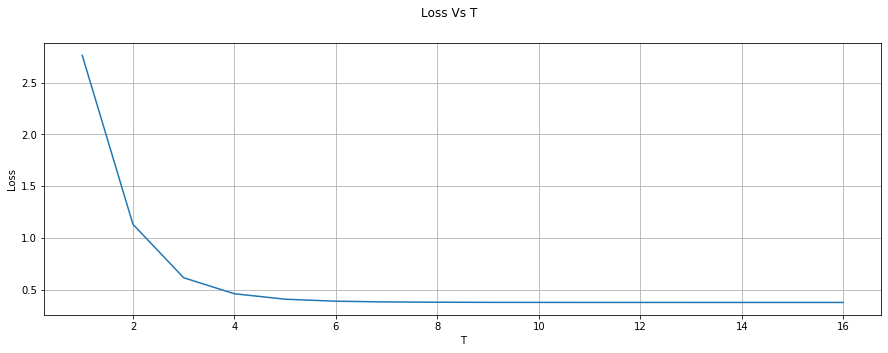

In [216]:
#𝑥1=(1,0),𝑥2=(1,1),𝑥3=(0,1),𝑥4=(0,0).

X = np.array([[1,0],
              [1,1],
              [0,1],
              [0,0]])
Y = np.array([[1],
              [0],
              [1],
              [0]])

train(X , Y, 2, .50,.1)